## Predicting Manufacturing Defects Dataset
### 
Insights into Factors Influencing Defect Rates and Production Efficiency

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score

In [3]:
df = pd.read_csv('C:/Users/odhia/OneDrive/Desktop/mlopsProjects/notebook/data/manufacturing_defect_dataset.csv')
df.head()

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
0,202,13175.403783,86.648534,1,3.121492,63.463494,9,0.052343,8.630515,0.081322,85.042379,0,2419.616785,0.468947,5.551639,236.439301,1
1,535,19770.046093,86.310664,4,0.819531,83.697818,20,4.908328,9.296598,0.038486,99.657443,7,3915.566713,0.119485,9.080754,353.957631,1
2,960,19060.820997,82.132472,0,4.514504,90.350550,1,2.464923,5.097486,0.002887,92.819264,2,3392.385362,0.496392,6.562827,396.189402,1
3,370,5647.606037,87.335966,5,0.638524,67.628690,8,4.692476,3.577616,0.055331,96.887013,8,4652.400275,0.183125,8.097496,164.135870,1
4,206,7472.222236,81.989893,3,3.867784,82.728334,9,2.746726,6.851709,0.068047,88.315554,7,1581.630332,0.263507,6.406154,365.708964,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductionVolume      3240 non-null   int64  
 1   ProductionCost        3240 non-null   float64
 2   SupplierQuality       3240 non-null   float64
 3   DeliveryDelay         3240 non-null   int64  
 4   DefectRate            3240 non-null   float64
 5   QualityScore          3240 non-null   float64
 6   MaintenanceHours      3240 non-null   int64  
 7   DowntimePercentage    3240 non-null   float64
 8   InventoryTurnover     3240 non-null   float64
 9   StockoutRate          3240 non-null   float64
 10  WorkerProductivity    3240 non-null   float64
 11  SafetyIncidents       3240 non-null   int64  
 12  EnergyConsumption     3240 non-null   float64
 13  EnergyEfficiency      3240 non-null   float64
 14  AdditiveProcessTime   3240 non-null   float64
 15  AdditiveMaterialCost 

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
count,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000
mean,548.523148,12423.018476,89.833290,2.558951,2.749116,80.134272,11.476543,2.501373,6.019662,0.050878,90.040115,4.591667,2988.494453,0.299776,5.472098,299.515479,0.840432
std,262.402073,4308.051904,5.759143,1.705804,1.310154,11.611750,6.872684,1.443684,2.329791,0.028797,5.723600,2.896313,1153.420820,0.116400,2.598212,116.379905,0.366261
min,100.000000,5000.174521,80.004820,0.000000,0.500710,60.010098,0.000000,0.001665,2.001611,0.000002,80.004960,0.000000,1000.720156,0.100238,1.000151,100.211137,0.000000
25%,322.000000,8728.829280,84.869219,1.000000,1.598033,70.103420,5.750000,1.264597,3.983249,0.026200,85.180203,2.000000,1988.140273,0.200502,3.228507,194.922058,1.000000
50%,549.000000,12405.204656,89.704861,3.000000,2.708775,80.265312,12.000000,2.465151,6.022389,0.051837,90.125743,5.000000,2996.822301,0.297470,5.437134,299.728918,1.000000
75%,775.250000,16124.462428,94.789936,4.000000,3.904533,90.353822,17.000000,3.774861,8.050222,0.075473,95.050838,7.000000,3984.788299,0.402659,7.741006,403.178283,1.000000
max,999.000000,19993.365549,99.989214,5.000000,4.998529,99.996993,23.000000,4.997591,9.998577,0.099997,99.996786,9.000000,4997.074741,0.499500,9.999749,499.982782,1.000000


### ProductionVolume: Number of units produced per day.100 to 1000 units/day.a## y.
### ProductionCost: Cost incurred for production per $5000 to $20000.g## istics
### SupplierQuality: Quality ratings of su Range: 80% to 100%.0## % to 100%.
### DeliveryDelay: Average delay Range: 0 to 5 days.n## d Defect Rates
### DefectRate: Defects per thousandRange: 0.5 to 5.0 defects.0## .5 to 5.0 defects.
### QualityScore: Overall(%) ## intenance and Downtime
### MaintenanceHours: Hours spent teg## er.
### DowntimePercentage: Percen0## % to 5%.
### Inventory Management
### InventoryTurnov
### stockout rate(%)
### Workforce Productivity(%)
### Data Type: Float (%).
### safety incidents;no. of safety incidents per month.
### energy consumption Kwh
### energy efficieny
### additiveprocesstime(hrs)
### additivematerialcost($)
### defectstatus 0:low defect,1:high defect

In [7]:
df.columns = df.columns.str.lower()
df.columns

Index(['productionvolume', 'productioncost', 'supplierquality',
       'deliverydelay', 'defectrate', 'qualityscore', 'maintenancehours',
       'downtimepercentage', 'inventoryturnover', 'stockoutrate',
       'workerproductivity', 'safetyincidents', 'energyconsumption',
       'energyefficiency', 'additiveprocesstime', 'additivematerialcost',
       'defectstatus'],
      dtype='object')

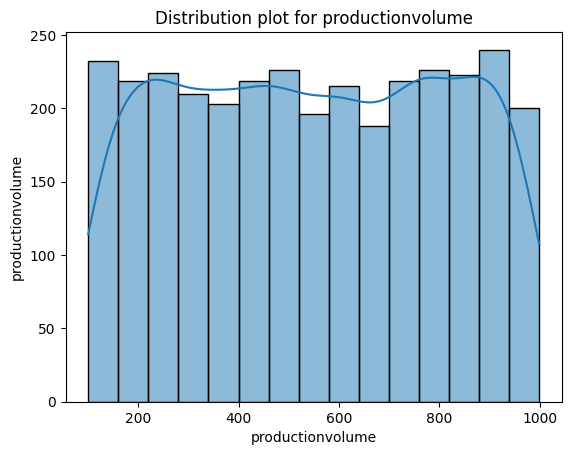

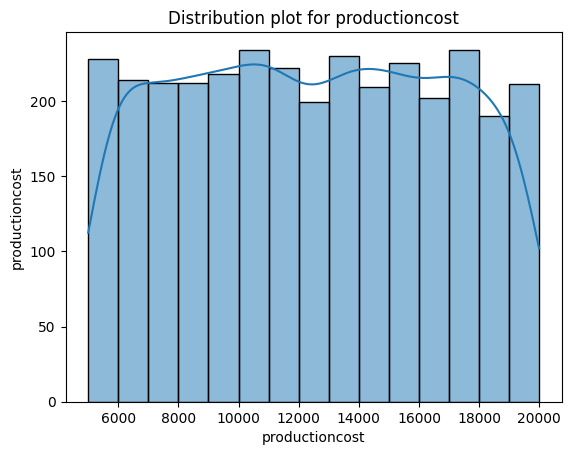

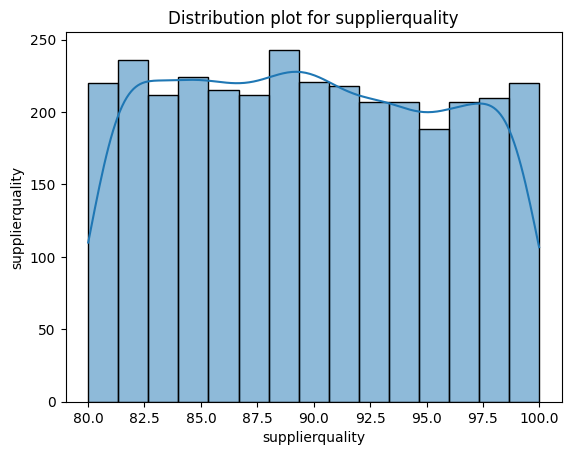

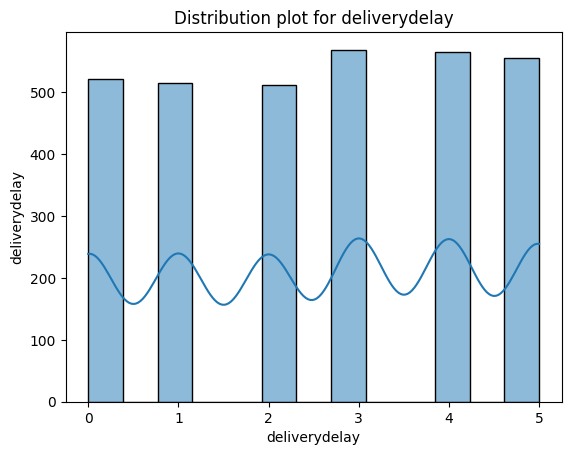

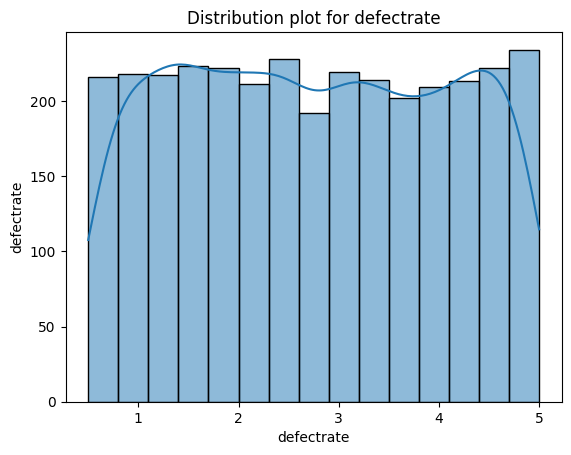

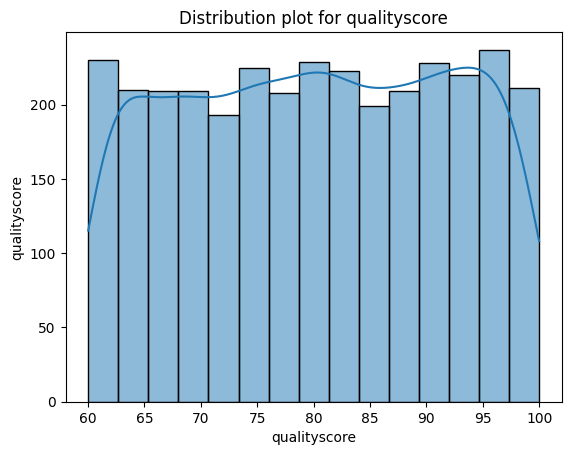

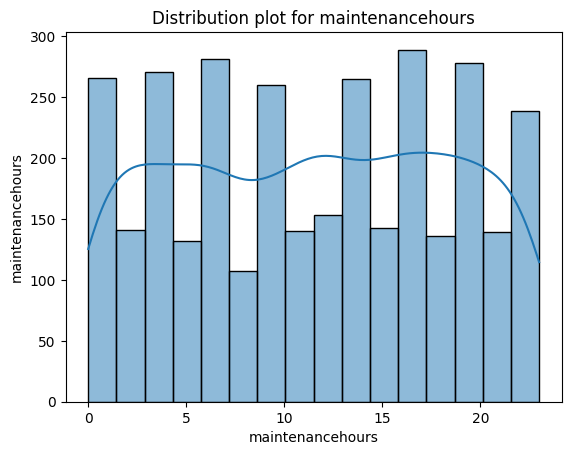

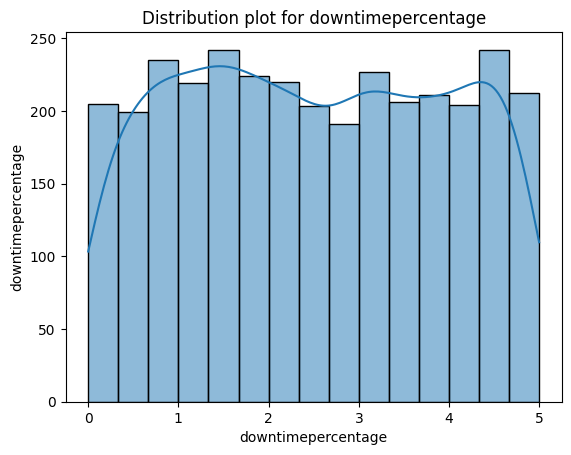

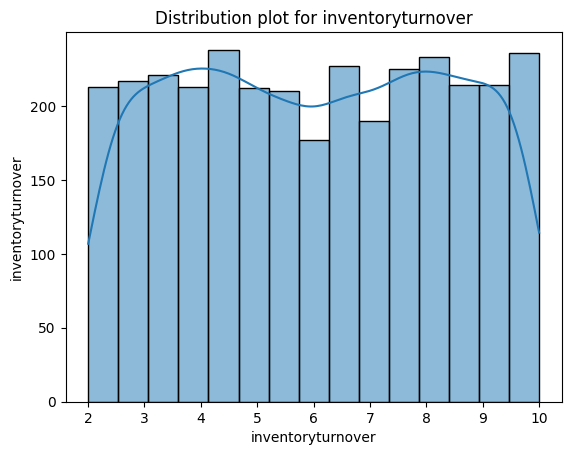

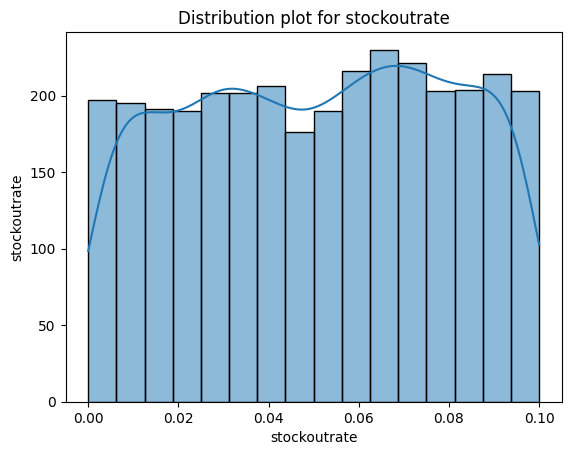

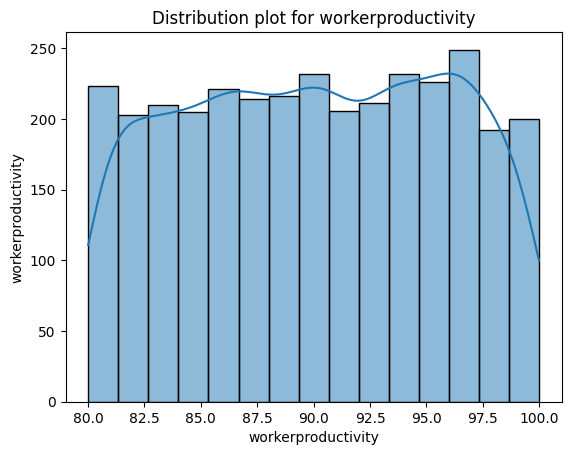

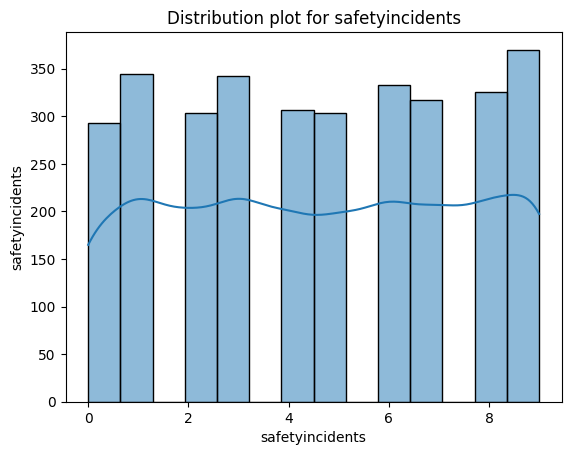

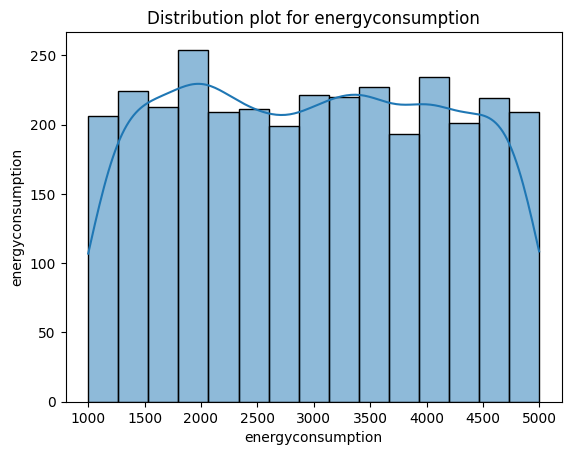

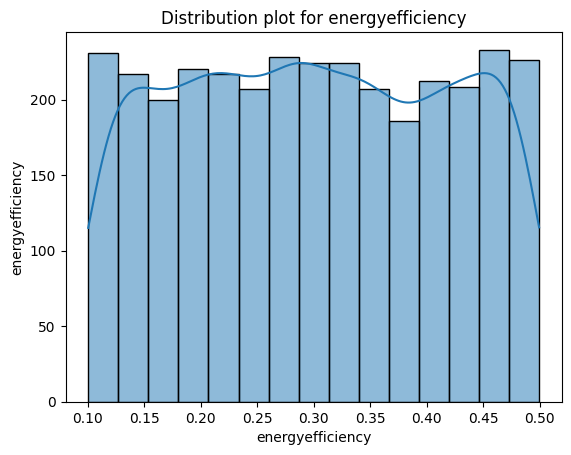

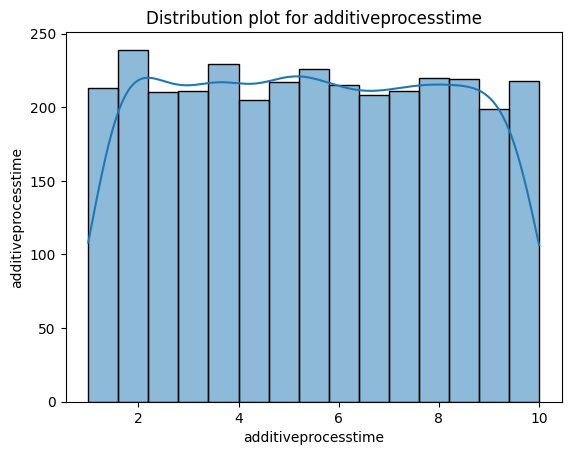

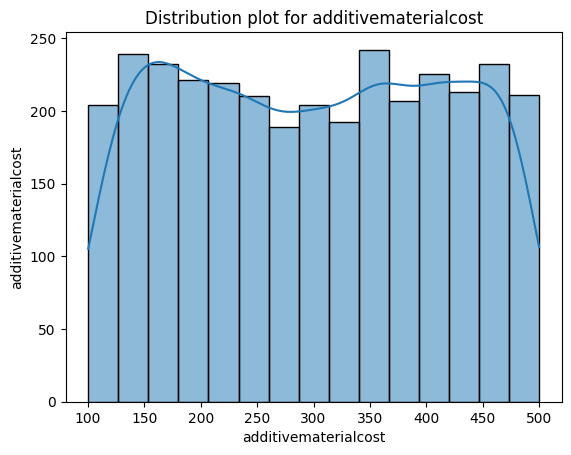

In [8]:
cols = ['productionvolume', 'productioncost', 'supplierquality',
       'deliverydelay', 'defectrate', 'qualityscore', 'maintenancehours',
       'downtimepercentage', 'inventoryturnover', 'stockoutrate',
       'workerproductivity', 'safetyincidents', 'energyconsumption',
       'energyefficiency', 'additiveprocesstime', 'additivematerialcost']
for i in cols:
    sns.histplot(df[i],kde=True)
    plt.title(f'Distribution plot for {i}')
    plt.ylabel(f'{i}')
    plt.show()

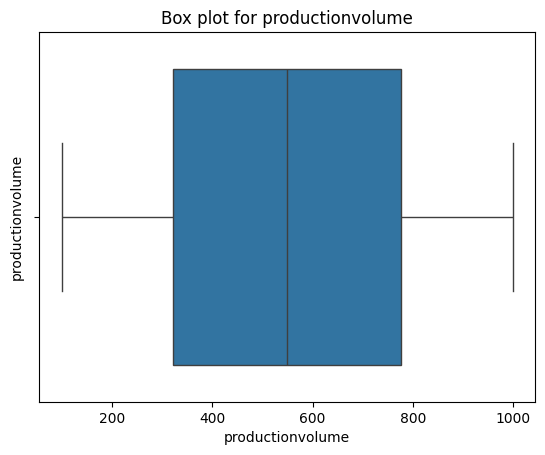

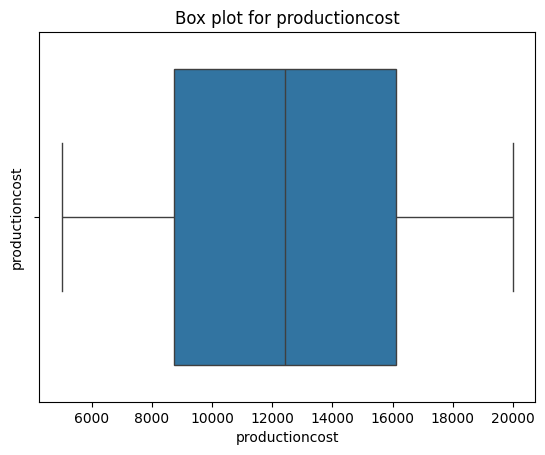

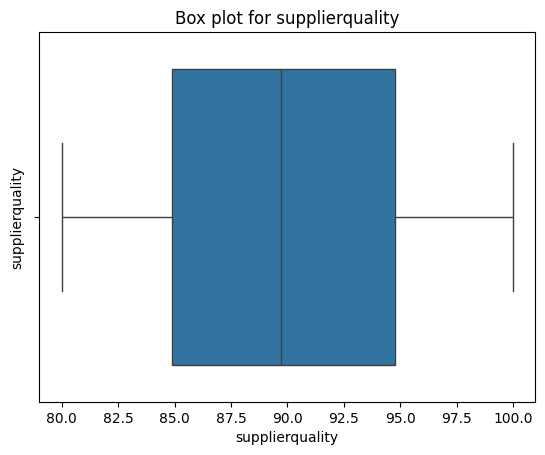

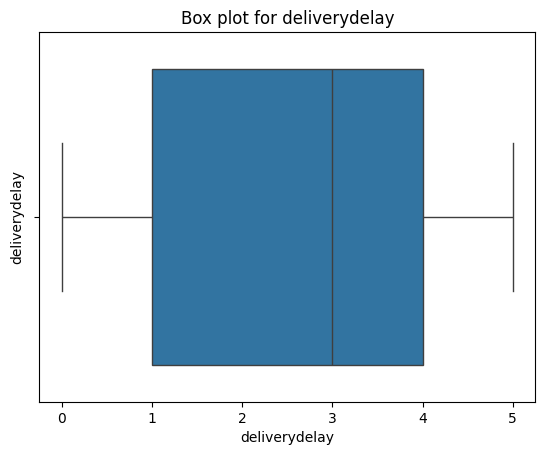

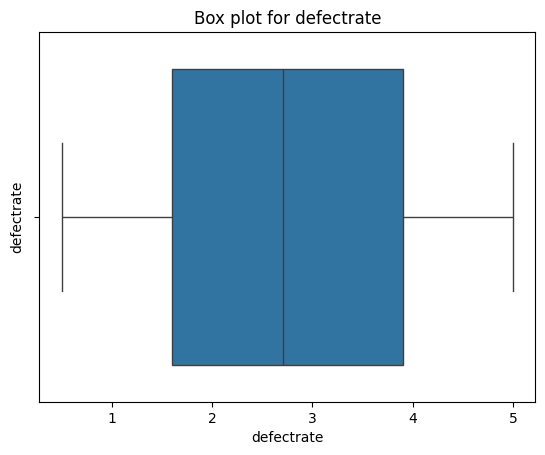

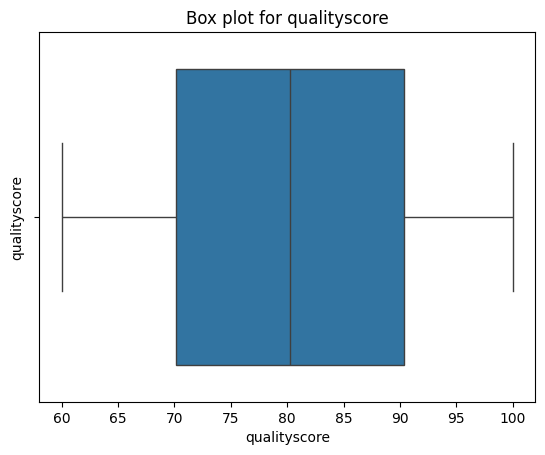

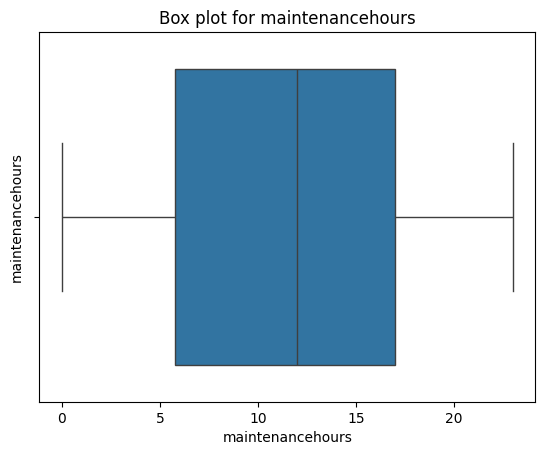

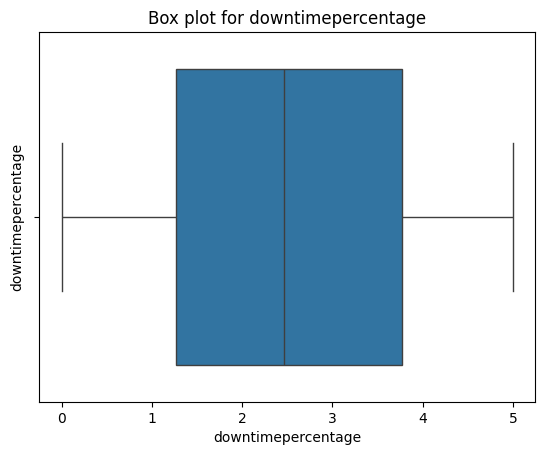

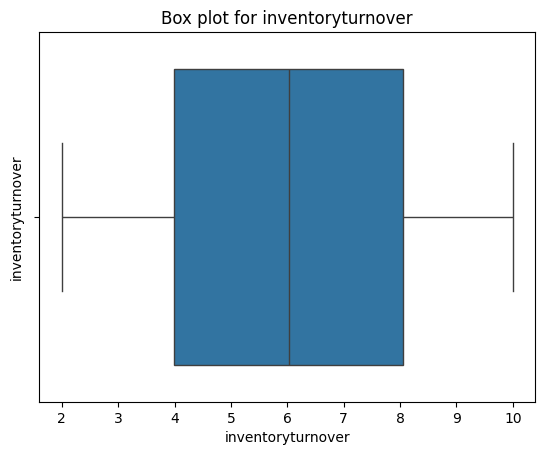

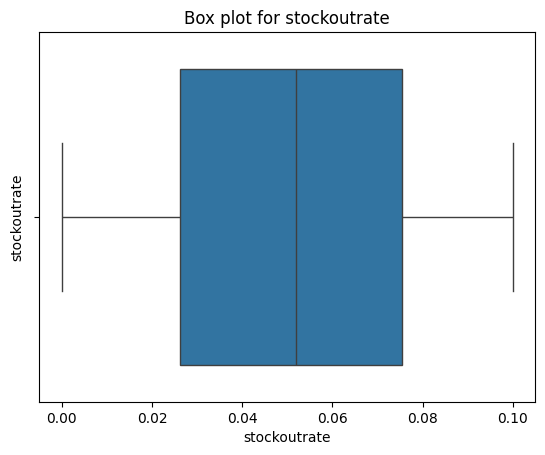

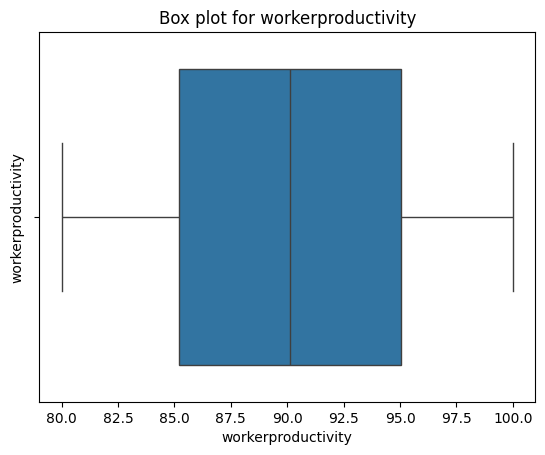

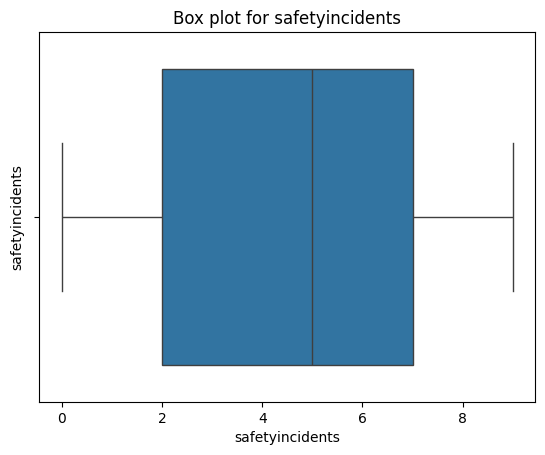

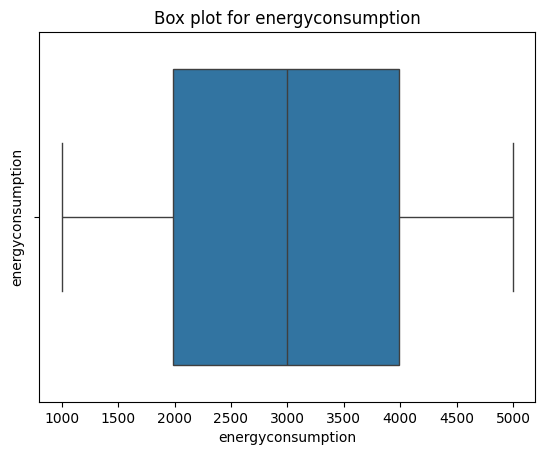

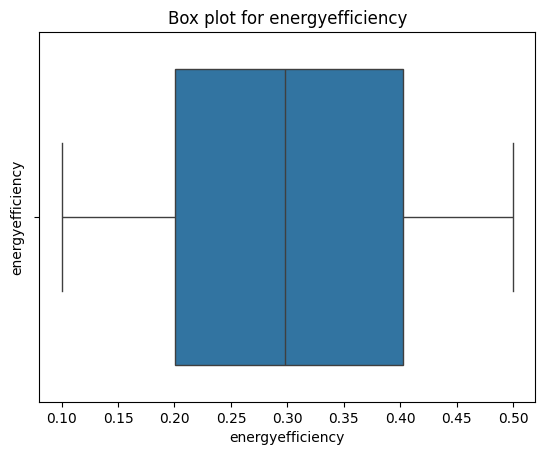

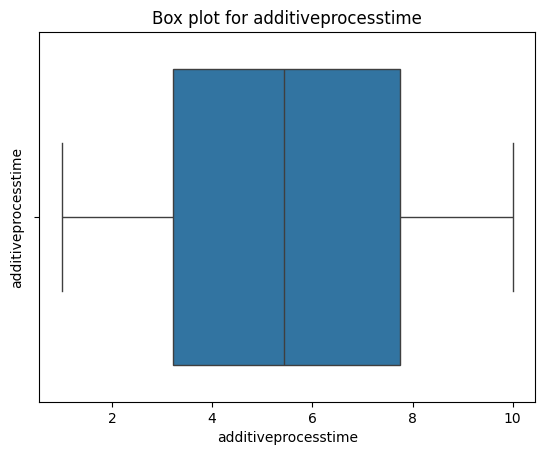

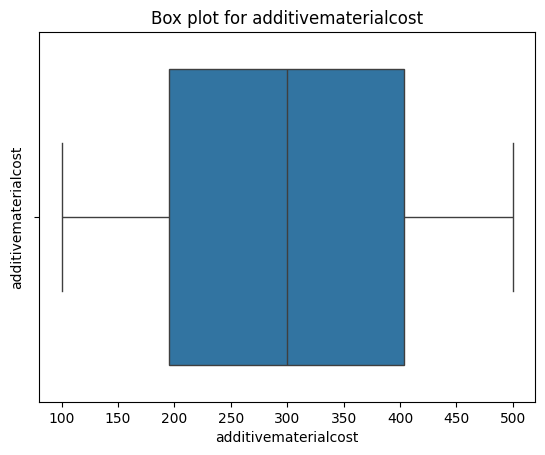

In [9]:
for i in cols:
    sns.boxplot(x=df[i])
    plt.title(f'Box plot for {i}')
    plt.ylabel(f'{i}')
    plt.show()

In [10]:
df.head()

,productionvolume,productioncost,supplierquality,deliverydelay,defectrate,qualityscore,maintenancehours,downtimepercentage,inventoryturnover,stockoutrate,workerproductivity,safetyincidents,energyconsumption,energyefficiency,additiveprocesstime,additivematerialcost,defectstatus
0,202,13175.403783,86.648534,1,3.121492,63.463494,9,0.052343,8.630515,0.081322,85.042379,0,2419.616785,0.468947,5.551639,236.439301,1
1,535,19770.046093,86.310664,4,0.819531,83.697818,20,4.908328,9.296598,0.038486,99.657443,7,3915.566713,0.119485,9.080754,353.957631,1
2,960,19060.820997,82.132472,0,4.514504,90.350550,1,2.464923,5.097486,0.002887,92.819264,2,3392.385362,0.496392,6.562827,396.189402,1
3,370,5647.606037,87.335966,5,0.638524,67.628690,8,4.692476,3.577616,0.055331,96.887013,8,4652.400275,0.183125,8.097496,164.135870,1
4,206,7472.222236,81.989893,3,3.867784,82.728334,9,2.746726,6.851709,0.068047,88.315554,7,1581.630332,0.263507,6.406154,365.708964,1


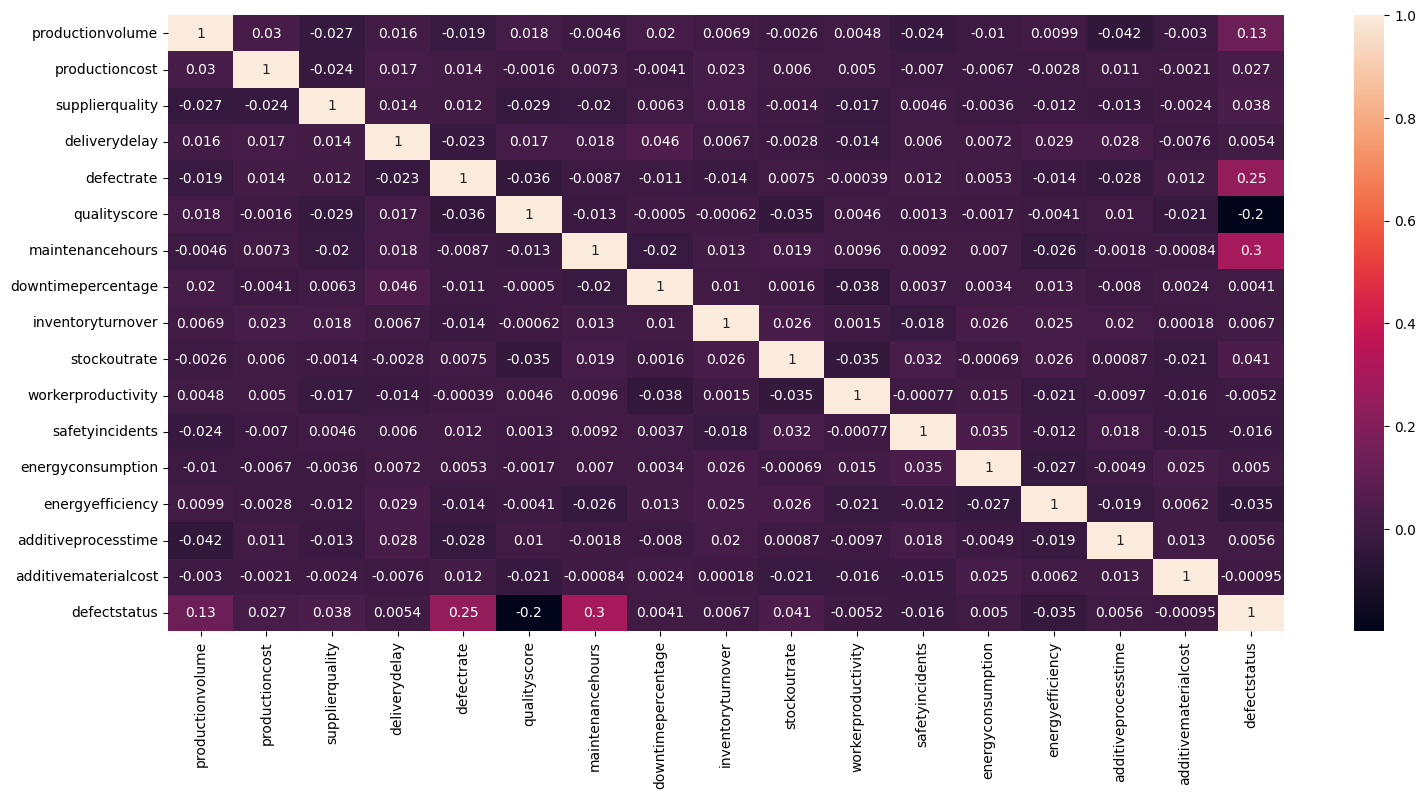

In [11]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [12]:
df.drop(['deliverydelay','downtimepercentage', 'inventoryturnover','workerproductivity','energyconsumption','additiveprocesstime', 'additivematerialcost'],axis=1,inplace=True)
df.head()

,productionvolume,productioncost,supplierquality,defectrate,qualityscore,maintenancehours,stockoutrate,safetyincidents,energyefficiency,defectstatus
0,202,13175.403783,86.648534,3.121492,63.463494,9,0.081322,0,0.468947,1
1,535,19770.046093,86.310664,0.819531,83.697818,20,0.038486,7,0.119485,1
2,960,19060.820997,82.132472,4.514504,90.350550,1,0.002887,2,0.496392,1
3,370,5647.606037,87.335966,0.638524,67.628690,8,0.055331,8,0.183125,1
4,206,7472.222236,81.989893,3.867784,82.728334,9,0.068047,7,0.263507,1


In [13]:
df.defectstatus.value_counts()

defectstatus
1    2723
0     517
Name: count, dtype: int64

<Axes: xlabel='defectstatus', ylabel='count'>

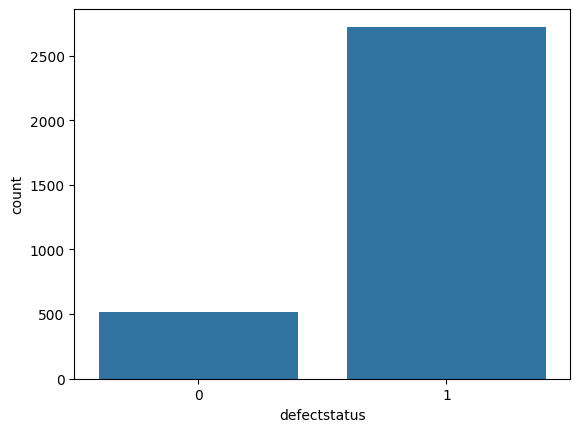

In [14]:
sns.countplot(x=df.defectstatus)

In [15]:
df.to_csv('C:/Users/odhia/OneDrive/Desktop/mlopsProjects/notebook/data/cleandata.csv',index=False)
df.head()

,productionvolume,productioncost,supplierquality,defectrate,qualityscore,maintenancehours,stockoutrate,safetyincidents,energyefficiency,defectstatus
0,202,13175.403783,86.648534,3.121492,63.463494,9,0.081322,0,0.468947,1
1,535,19770.046093,86.310664,0.819531,83.697818,20,0.038486,7,0.119485,1
2,960,19060.820997,82.132472,4.514504,90.350550,1,0.002887,2,0.496392,1
3,370,5647.606037,87.335966,0.638524,67.628690,8,0.055331,8,0.183125,1
4,206,7472.222236,81.989893,3.867784,82.728334,9,0.068047,7,0.263507,1


In [23]:
df.columns

Index(['productionvolume', 'productioncost', 'supplierquality', 'defectrate',
       'qualityscore', 'maintenancehours', 'stockoutrate', 'safetyincidents',
       'energyefficiency', 'defectstatus'],
      dtype='object')

In [16]:
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X = df.drop('defectstatus',axis=1)
y = df.defectstatus
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
models = {
    'Logistic Regression':LogisticRegression(),
    'SVC':SVC(),
    'KNeighbours':KNeighborsClassifier(),
    'Cat Boost':CatBoostClassifier(logging_level='Silent'),
    'XGB':XGBClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),  
}

In [19]:
report = {}
print("Models' Report")
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    score = accuracy_score(y_test,prediction)
    report[list(models.keys())[i]] = score
best_score = max(sorted(list(report.values())))
for k,v in report.items():
    if v == best_score:
        best_model_name = k
        break
print(report)
print(f"{best_model_name} is the best model with accuracy of {best_score}")

Models' Report
{'Logistic Regression': 0.762848751835536, 'SVC': 0.8494860499265786, 'KNeighbours': 0.8296622613803231, 'Cat Boost': 0.9816446402349486, 'XGB': 0.9875183553597651, 'Decision Tree': 0.9588839941262849, 'Random Forest': 0.9919236417033774}
Random Forest is the best model with accuracy of 0.9919236417033774


In [20]:
classifier = models[best_model_name]
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [21]:
pred = classifier.predict(X_test)
print(confusion_matrix(y_test,pred))

[[654   4]
 [  9 695]]


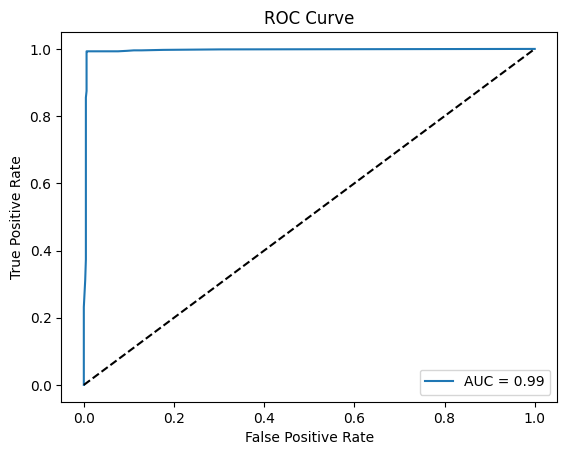

In [22]:
probs = classifier.predict_proba(X_test)

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
auc_score = roc_auc_score(y_test, probs[:, 1])

# Plot the ROC curve
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()